In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv('manufacturing.csv')

In [4]:
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [15]:
x=df.iloc[:,:-1]
x

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06
...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06


In [17]:
y=df.iloc[:,5:]

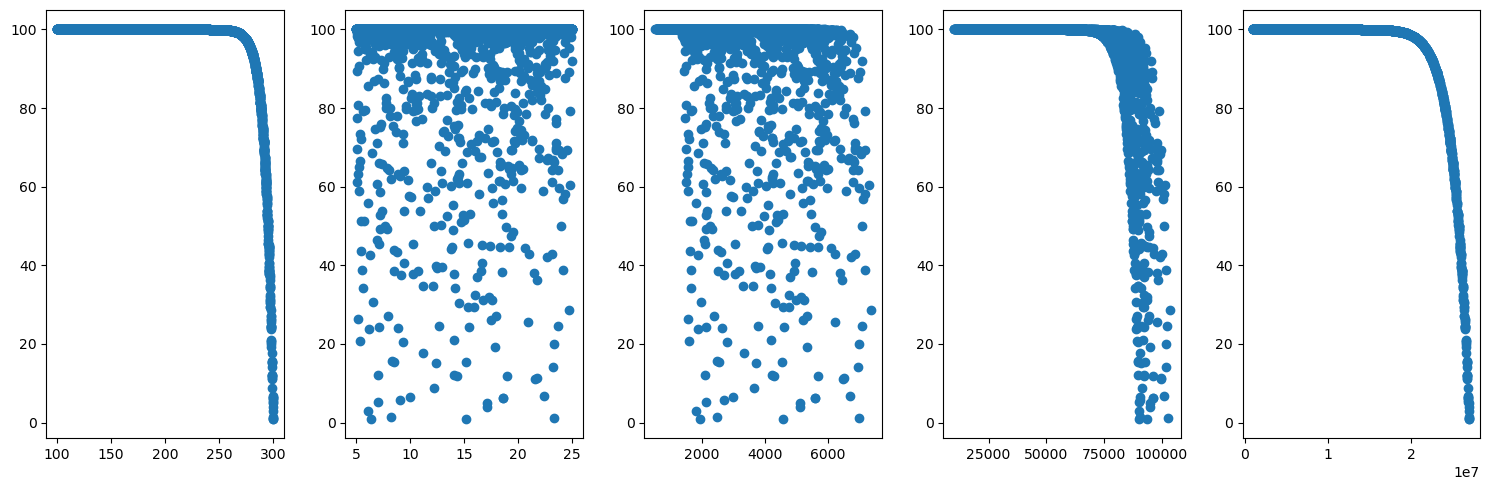

In [43]:
plt.figure(figsize=(15, 5))
for i , col in enumerate(x):
    plt.subplot(1,5,i+1)
    plt.scatter(x[col],y)
plt.tight_layout()
plt.show()

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
lr_model=LinearRegression()
lr_model

LinearRegression()

In [48]:
lr_model.fit(x_train,y_train)


LinearRegression()

In [60]:
y_lr=lr_model.predict(x_test)

Polynomial linear Reg


In [76]:
poly_reg=PolynomialFeatures(degree=4)
x_pol=poly_reg.fit_transform(x_train)

In [77]:
poly_lin_reg=LinearRegression()
poly_lin_reg.fit(x_pol,y_train)

LinearRegression()

In [78]:
y_plo_predict=poly_lin_reg.predict(poly_reg.fit_transform(x_test))

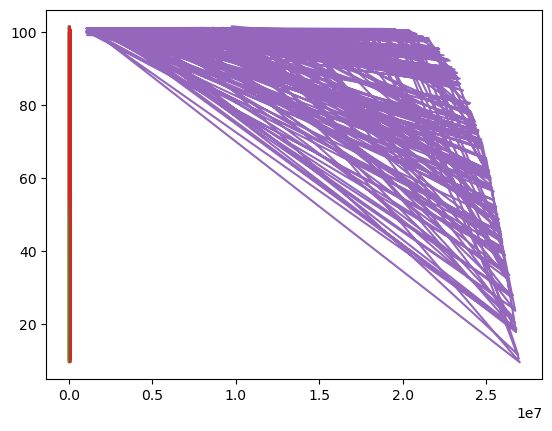

In [79]:
plt.plot(x_test,y_plo_predict)

In [80]:
cost=skm.mean_squared_error(y_test,y_plo_predict)
cost

1.279128646233916